# DataCamp - Intermediate SQL

- This Notebook contains solutions to all the exercises of the course [Intermediate SQL](https://app.datacamp.com/learn/courses/intermediate-sql). In this Notebook first the csv files are loaded from the datasets table as pandas dataframes, and then SQL Queries are run on them using the **duckdb** library.The syntax of running the SQL query in duckdb is the following:\
duckdb.query(**SQL-Query-here**).to_df().
- Backslashes (\\) were put in place in order to move to the next line in the cell and are not part of the query
- All solutions are verified

# Loading Datasets

In [65]:
import pandas as pd
import pandas as pd
import duckdb

In [67]:
films = pd.read_csv('./datasets/films.csv',\
                      header=None, names=['id', 'title', 'release_year', 'country', 'duration', 'language', 'certification',\
                                          'gross', 'budget'])

people = pd.read_csv('./datasets/people.csv',\
                      header=None, names=['id', 'name', 'birthdate', 'deathdate'])

reviews = pd.read_csv('./datasets/reviews.csv',\
                      header=None, names=['id', 'film_id', 'num_user', 'num_critic', 'imdb_score', 'num_votes',\
                                          'facebook_likes'])


roles = pd.read_csv('./datasets/roles.csv',\
                      header=None, names=['id', 'film_id', 'person_id', 'role'])

In [68]:
films.head()

,id,title,release_year,country,duration,language,certification,gross,budget
0,1,Intolerance: Love's Struggle Throughout the Ages,1916.0,USA,123.0,NaN,Not Rated,NaN,385907.0
1,2,Over the Hill to the Poorhouse,1920.0,USA,110.0,NaN,NaN,3000000.0,100000.0
2,3,The Big Parade,1925.0,USA,151.0,NaN,Not Rated,NaN,245000.0
3,4,Metropolis,1927.0,Germany,145.0,German,Not Rated,26435.0,6000000.0
4,5,Pandora's Box,1929.0,Germany,110.0,German,Not Rated,9950.0,NaN


In [69]:
people.head()

,id,name,birthdate,deathdate
0,1,50 Cent,1975-07-06,NaN
1,2,A. Michael Baldwin,1963-04-04,NaN
2,3,A. Raven Cruz,NaN,NaN
3,4,A.J. Buckley,1978-02-09,NaN
4,5,A.J. DeLucia,NaN,NaN


In [70]:
reviews.head()

,id,film_id,num_user,num_critic,imdb_score,num_votes,facebook_likes
0,3934,588.0,432.0,7.1,203461,46000,NaN
1,3405,285.0,267.0,6.4,149998,0,NaN
2,478,65.0,29.0,3.2,8465,491,NaN
3,74,83.0,25.0,7.6,7071,930,NaN
4,1254,1437.0,224.0,8.0,241030,13000,NaN


In [71]:
roles.head()

,id,film_id,person_id,role
0,1,1,1630,director
1,2,1,4843,actor
2,3,1,5050,actor
3,4,1,8175,actor
4,5,2,3000,director


## Chapter 1: Selecting Data

### Querying Database

**Count the number of records in the people table**

In [72]:
duckdb.query(\
             "SELECT COUNT(*) as count_records from people;"\
            ).to_df()

,count_records
0,8397


**Count the number of records with a birthdate in the people table, aliasing the result as count_birthdate.**

In [73]:
duckdb.query(\
             "SELECT COUNT(birthdate) as count_birthdate from people;"\
            ).to_df()

,count_birthdate
0,6152


**Count the records for languages and countries in the films table; alias as count_languages and count_countries.**

In [74]:
duckdb.query(\
             "SELECT COUNT(language) as count_languages\
             , COUNT(country) as count_countries from films;"\
            ).to_df()

,count_languages,count_countries
0,4955,4966


**Return the unique countries represented in the films table using DISTINCT.**

In [75]:
duckdb.query(\
             "SELECT DISTINCT(country) FROM films"\
            ).to_df()

,country
0,USA
1,Germany
2,Japan
3,Denmark
4,UK
...,...
60,Slovenia
61,Pakistan
62,Chile
63,Panama


**Return the number of unique countries represented in the films table, aliased as count_distinct_countries.**

In [76]:
duckdb.query(\
             "SELECT COUNT(DISTINCT(country)) as count_distinct_countries FROM films"\
            ).to_df()

,count_distinct_countries
0,64


### SQL Query Execution Order

<div>
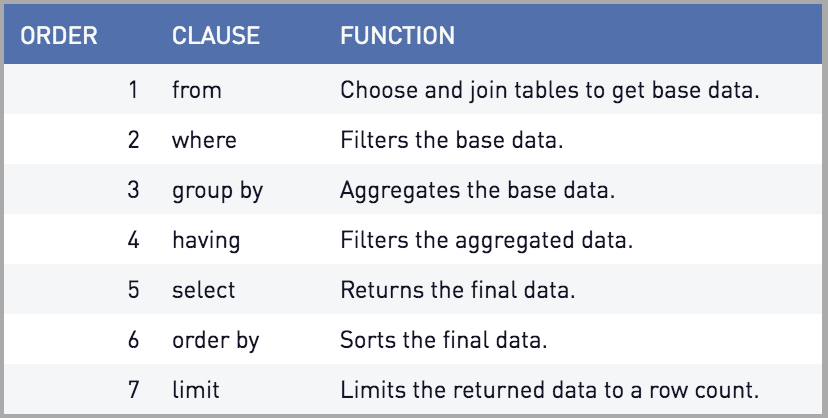
</div>

*If a column has space, it should be written in " ", eg. "facebook likes"*

## Chapter 2: Filtering Records

Topics Covered:
- Filtering Numbers
- Multiple criteria
- Filtering text
- NULL values

### Filtering Numbers

*The WHERE clause allows you to filter based on text and numeric values in a table using comparison operators.*

**Select film_ids and imdb_score with an imdb_score over 7.0**

In [77]:
duckdb.query(\
             "select film_id, imdb_score from reviews\
             where imdb_score > 7"\
            ).to_df()

,film_id,imdb_score
0,588.0,203461
1,285.0,149998
2,65.0,8465
3,83.0,7071
4,1437.0,241030
...,...,...
4955,2.0,75
4956,514.0,181472
4957,85.0,29738
4958,118.0,29591


**Select the film_id and facebook_likes of the first ten records with less than 1000 likes from the reviews table.**

In [78]:
duckdb.query(\
             "select film_id, facebook_likes from reviews\
             where facebook_likes < 1000\
             limit 10"\
            ).to_df()

,film_id,facebook_likes


**Count how many records have a num_votes of at least 100,000; use the alias films_over_100K_votes.**

In [79]:
duckdb.query(\
             "select count(*) as films_over_100K_votes\
             from reviews\
             where num_votes >= 100000"\
            ).to_df()

,films_over_100K_votes
0,46


**Select and count the language field using the alias count_spanish. Apply a filter to select only Spanish from the language field.**

In [80]:
duckdb.query(\
             "select count(language) as count_spanish\
             from films\
             where language = 'Spanish'"\
            ).to_df()

,count_spanish
0,40


### Multiple criteria

**Select the title and release_year for all German-language films released before 2000.**

In [81]:
duckdb.query(\
             "select title, release_year\
             from films\
             where language = 'German' and release_year < 2000"\
            ).to_df()

,title,release_year
0,Metropolis,1927.0
1,Pandora's Box,1929.0
2,The Torture Chamber of Dr. Sadism,1967.0
3,Das Boot,1981.0
4,Run Lola Run,1998.0
5,Aimee & Jaguar,1999.0


**Update the query from the previous step to show German-language films released after 2000 rather than before.**

In [82]:
duckdb.query(\
             "select title, release_year\
             from films\
             where language = 'German' and release_year > 2000"\
            ).to_df()

,title,release_year
0,Good Bye Lenin!,2003.0
1,Downfall,2004.0
2,Summer Storm,2004.0
3,The Lives of Others,2006.0
4,The Baader Meinhof Complex,2008.0
5,The Wave,2008.0
6,Cargo,2009.0
7,Soul Kitchen,2009.0
8,The White Ribbon,2009.0
9,3,2010.0


**Select all details for German-language films released after 2000 but before 2010 using only WHERE and AND.**

In [83]:
duckdb.query(\
             "select *\
             from films\
             where release_year <2010 and release_year > 2000 and language = 'German'"\
            ).to_df()

,id,title,release_year,country,duration,language,certification,gross,budget
0,1952,Good Bye Lenin!,2003.0,Germany,121.0,German,R,4063859.0,4800000.0
1,2130,Downfall,2004.0,Germany,178.0,German,R,5501940.0,13500000.0
2,2224,Summer Storm,2004.0,Germany,98.0,German,R,95016.0,2700000.0
3,2709,The Lives of Others,2006.0,Germany,137.0,German,R,11284657.0,2000000.0
4,3100,The Baader Meinhof Complex,2008.0,Germany,184.0,German,R,476270.0,20000000.0
5,3143,The Wave,2008.0,Germany,107.0,German,NaN,NaN,5000000.0
6,3220,Cargo,2009.0,Switzerland,112.0,German,NaN,NaN,4500000.0
7,3346,Soul Kitchen,2009.0,Germany,99.0,German,NaN,274385.0,4000000.0
8,3412,The White Ribbon,2009.0,Germany,144.0,German,R,2222647.0,12000000.0


**Select the title and release_year for films released in 1990 or 1999 using only WHERE and OR.**

In [84]:
duckdb.query(\
             "select title, release_year\
             from films\
             where release_year = 1990 or release_year = 1999"\
            ).to_df()

,title,release_year
0,Arachnophobia,1990.0
1,Back to the Future Part III,1990.0
2,Child's Play 2,1990.0
3,Dances with Wolves,1990.0
4,Days of Thunder,1990.0
...,...,...
193,Twin Falls Idaho,1999.0
194,Universal Soldier: The Return,1999.0
195,Varsity Blues,1999.0
196,Wild Wild West,1999.0


**In the above query, Filter the records to only include English or Spanish-language films.**

In [85]:
duckdb.query(\
             "select title, release_year\
             from films\
             where (release_year = 1990 or release_year = 1999) and (language = 'English' or language = 'Spanish') "\
            ).to_df()

,title,release_year
0,Arachnophobia,1990.0
1,Back to the Future Part III,1990.0
2,Child's Play 2,1990.0
3,Dances with Wolves,1990.0
4,Days of Thunder,1990.0
...,...,...
191,Twin Falls Idaho,1999.0
192,Universal Soldier: The Return,1999.0
193,Varsity Blues,1999.0
194,Wild Wild West,1999.0


**In the above query, Finally, restrict the query to only return films worth more than $2,000,000 gross.**

In [86]:
duckdb.query(\
             "select title, release_year\
             from films\
             where (release_year = 1990 or release_year = 1999) and (language = 'English' or language = 'Spanish') \
             and gross > 2000000"\
            ).to_df()

,title,release_year
0,Arachnophobia,1990.0
1,Back to the Future Part III,1990.0
2,Child's Play 2,1990.0
3,Dances with Wolves,1990.0
4,Days of Thunder,1990.0
...,...,...
163,Trippin',1999.0
164,Universal Soldier: The Return,1999.0
165,Varsity Blues,1999.0
166,Wild Wild West,1999.0


**Select the title and release_year of all films released between 1990 and 2000 (inclusive) using BETWEEN.**

In [87]:
duckdb.query(\
             "select title, release_year\
             from films\
             where release_year between 1990 and 2000"\
            ).to_df()

,title,release_year
0,Arachnophobia,1990.0
1,Back to the Future Part III,1990.0
2,Child's Play 2,1990.0
3,Dances with Wolves,1990.0
4,Days of Thunder,1990.0
...,...,...
952,Whipped,2000.0
953,Woman on Top,2000.0
954,Wonder Boys,2000.0
955,X-Men,2000.0


**Build on your previous query to select only films with a budget over $100 million.**

In [88]:
duckdb.query(\
             "select title, release_year\
             from films\
             where (release_year between 1990 and 2000) and budget > 100000000"\
            ).to_df()

,title,release_year
0,Terminator 2: Judgment Day,1991.0
1,True Lies,1994.0
2,Waterworld,1995.0
3,Batman & Robin,1997.0
4,Dante's Peak,1997.0
5,Princess Mononoke,1997.0
6,Speed 2: Cruise Control,1997.0
7,Starship Troopers,1997.0
8,Titanic,1997.0
9,Tomorrow Never Dies,1997.0


**Using the above query, Now, restrict the query to only return Spanish-language films.**

In [89]:
duckdb.query(\
             "select title, release_year\
             from films\
             where (release_year between 1990 and 2000) and budget > 100000000 and language = 'Spanish'"\
            ).to_df()

,title,release_year
0,Tango,1998.0


**In the abive query, Finally, amend the query to include all Spanish-language or French-language films with the same criteria.**

In [90]:
duckdb.query(\
             "select title, release_year\
             from films\
             where (release_year between 1990 and 2000) and budget > 100000000 and (language = 'Spanish' or language = 'French')"\
            ).to_df()

,title,release_year
0,Tango,1998.0
1,Les couloirs du temps: Les visiteurs II,1998.0


### Filtering text

To filter a pattern in text instead of the entire text, we can use:
- LIKE
- NOT LIKE
- IN

<div>
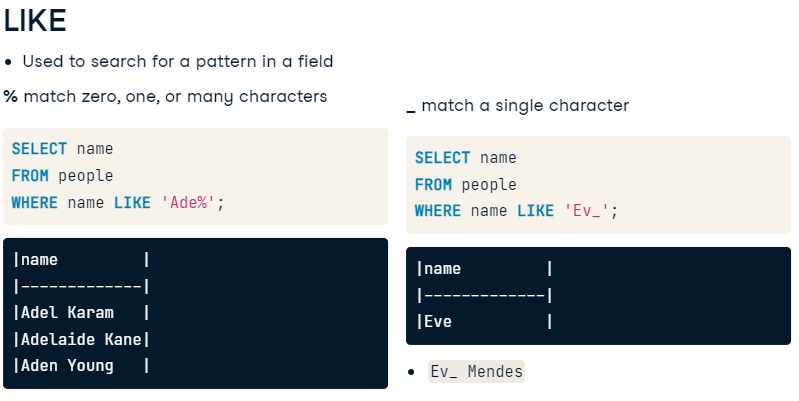
</div>

<div>
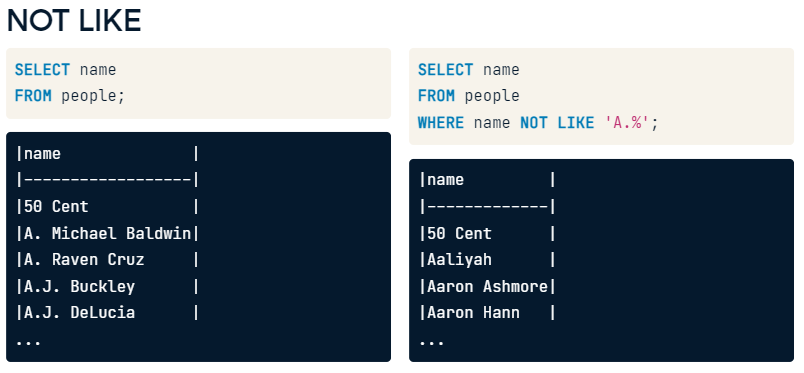
</div>

**Select the names of all people whose names begin with 'B'.**

In [91]:
duckdb.query(\
             "select name from people where name like 'B%'"\
            ).to_df()

,name
0,B.J. Novak
1,Babak Najafi
2,Babar Ahmed
3,Bahare Seddiqi
4,Bai Ling
...,...
440,Buster Keaton
441,Busy Philipps
442,Buzz Aldrin
443,Byron Howard


**Select the names of people whose names have 'r' as the second letter.**

In [92]:
duckdb.query(\
             "select name from people where name like '_r%'"\
            ).to_df()

,name
0,Ara Celi
1,Aramis Knight
2,Arben Bajraktaraj
3,Arcelia RamÃ­rez
4,Archie Kao
...,...
525,Troy Garity
526,Troy Miller
527,Troy Nixey
528,Ursula Andress


**Select the names of people whose names don't start with 'A'.**

In [93]:
duckdb.query(\
             "select name from people where name not like 'A%'"\
            ).to_df()

,name
0,50 Cent
1,Ãlex Angulo
2,Ãlex de la Iglesia
3,Ãngela Molina
4,B.J. Novak
...,...
7763,Zohra Segal
7764,Zooey Deschanel
7765,Zoran Lisinac
7766,Zubaida Sahar


**Select the title and release_year of all films released in 1990 or 2000 that were longer than two hours.**

In [94]:
duckdb.query(\
             "select title, release_year from films where release_year in (1990, 2000) and duration > 120"\
            ).to_df()

,title,release_year
0,Dances with Wolves,1990.0
1,Die Hard 2,1990.0
2,Ghost,1990.0
3,Goodfellas,1990.0
4,Mo' Better Blues,1990.0
5,Pretty Woman,1990.0
6,The Godfather: Part III,1990.0
7,The Hunt for Red October,1990.0
8,All the Pretty Horses,2000.0
9,Almost Famous,2000.0


**Select the title and language of all films in English, Spanish, or French using IN.**

In [95]:
duckdb.query(\
             "select title, language from films where language in ('English', 'Spanish', 'French')"\
            ).to_df()

,title,language
0,The Broadway Melody,English
1,Hell's Angels,English
2,A Farewell to Arms,English
3,42nd Street,English
4,She Done Him Wrong,English
...,...,...
4742,The Blue Room,French
4743,Animal Kingdom: Let's go Ape,French
4744,Evolution,French
4745,They Will Have to Kill Us First,French


**Select the title, certification and language of all films certified NC-17 or R that are in English, Italian, or Greek.**

In [96]:
duckdb.query(\
             "select title, certification, language from films where \
             certification in ('NC-17', 'R') and language in ('English', 'Italian', 'Greek')"\
            ).to_df()

,title,certification,language
0,Pink Flamingos,NC-17,English
1,The Evil Dead,NC-17,English
2,Showgirls,NC-17,English
3,Orgazmo,NC-17,English
4,L.I.E.,NC-17,English
...,...,...,...
2001,The Neon Demon,R,English
2002,The Perfect Match,R,English
2003,The Purge: Election Year,R,English
2004,The Veil,R,English


- **Count the unique titles from the films database and use the alias provided (nineties_english_films_for_teens).**
- **Filter to include only movies with a release_year from 1990 to 1999, inclusive.**
- **Add another filter narrowing your query down to English-language films.**
- **Add a final filter to select only films with 'G', 'PG', 'PG-13' certifications.**

In [97]:
duckdb.query(\
             "select count(distinct(title)) as nineties_english_films_for_teens from films\
             where (release_year between 1990 and 1999)\
             and language = 'English'\
             and certification in ('G', 'PG', 'PG-13')"\
            ).to_df()

,nineties_english_films_for_teens
0,310


### NULL Values

**Select the title of every film that doesn't have a budget associated with it and use the alias no_budget_info.**

In [98]:
duckdb.query(\
             "select title as no_budget_info from films where budget is null"\
            ).to_df()

,no_budget_info
0,Pandora's Box
1,The Prisoner of Zenda
2,The Blue Bird
3,Bambi
4,State Fair
...,...
425,Unforgotten
426,Wings
427,Wolf Creek
428,Wuthering Heights


**Count the number of films with a language associated with them and use the alias count_language_known.**

In [99]:
duckdb.query(\
             "select count(*) as count_language_known from films where language is not null"\
            ).to_df()

,count_language_known
0,4955


## Chapter 3: Aggregate Functions

Topics Covered:

- Summarizing Data
- Summarizing Subsets
- Aliasing and Arithmetic

### Summarizing Data

- Count, MIN and MAX can work on various data types

**Use the SUM() function to calculate the total duration of all films and alias with total_duration.**

In [100]:
duckdb.query(\
             "select sum(duration) as total_duration from films"\
            ).to_df()

,total_duration
0,534882.0


**Calculate the average duration of all films and alias with average_duration.**

In [101]:
duckdb.query(\
             "select avg(duration) as average_duration from films"\
            ).to_df()

,average_duration
0,107.947931


**Find the most recent release_year in the films table, aliasing as latest_year.**

In [102]:
duckdb.query(\
             "select max(release_year) as latest_year from films"\
            ).to_df()

,latest_year
0,2016.0


**Find the duration of the shortest film and use the alias shortest_film.**


In [103]:
duckdb.query(\
             "select min(duration) as shortest_film from films"\
            ).to_df()

,shortest_film
0,7.0


### Summarizing Subsets

**Use SUM() to calculate the total gross for all films made in the year 2000 or later, and use the alias total_gross.**

In [104]:
duckdb.query(\
            "select sum(gross) as total_gross from films\
            where release_year >= 2000"\
            ).to_df()

,total_gross
0,1.509009e+11


**Calculate the average amount grossed by all films whose titles start with the letter 'A' and alias with avg_gross_A.**

In [105]:
duckdb.query(\
            "select avg(gross) as avg_gross_A from films where title like 'A%'"\
            ).to_df()

,avg_gross_A
0,4.789324e+07


**Calculate the lowest gross film in 1994 and use the alias lowest_gross.**

In [106]:
duckdb.query(\
            "select min(gross) as lowest_gross from films where release_year = 1994"\
            ).to_df()

,lowest_gross
0,125169.0


**Calculate the highest gross film between 2000 and 2012, inclusive, and use the alias highest_gross**

In [107]:
duckdb.query(\
            "select max(gross) as highest_gross from films where release_year between 2000 and 2012"\
            ).to_df()

,highest_gross
0,760505847.0


**Calculate the average facebook_likes to one decimal place and assign to the alias, avg_facebook_likes.**

In [108]:
duckdb.query(\
            "select round(avg(facebook_likes), 1) as avg_facebook_likes from reviews"\
            ).to_df()

,avg_facebook_likes
0,NaN


**Calculate the average budget from the films table, aliased as avg_budget_thousands, and round to the nearest thousand.**

In [109]:
duckdb.query(\
            "select round(avg(budget), -3) as avg_budget_thousands from films"\
            ).to_df()

,avg_budget_thousands
0,39903000.0


### Aliasing and arithmetic

<div>
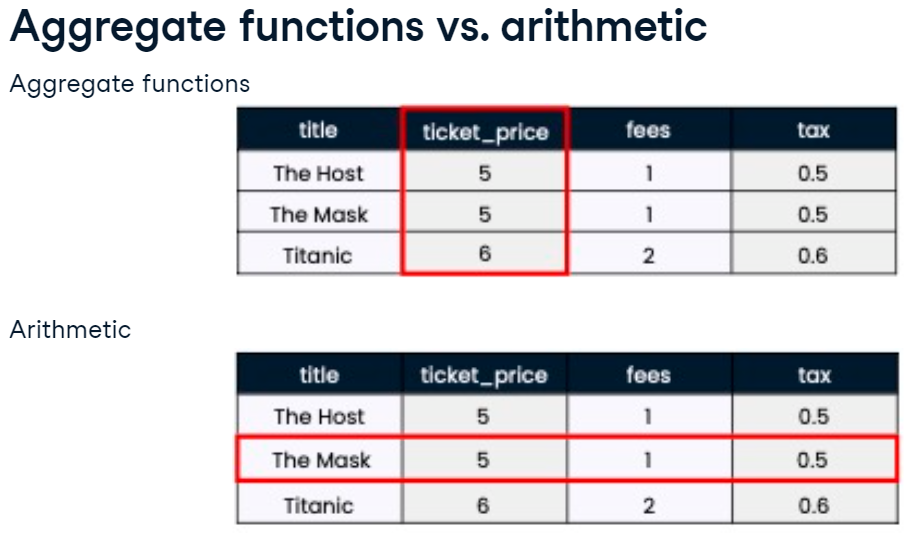
</div>

- Arithmetic on same datatype gives the same datatype in SQL, eg. int divided by int gives int

**Select the title and duration in hours for all films and alias as duration_hours; since the current durations are in minutes, you'll need to divide duration by 60.0.**

In [110]:
duckdb.query(\
            "select title, duration / 60.0 as duration_hours from films"\
            ).to_df()

,title,duration_hours
0,Intolerance: Love's Struggle Throughout the Ages,2.050000
1,Over the Hill to the Poorhouse,1.833333
2,The Big Parade,2.516667
3,Metropolis,2.416667
4,Pandora's Box,1.833333
...,...,...
4963,Unforgotten,0.750000
4964,Wings,0.500000
4965,Wolf Creek,NaN
4966,Wuthering Heights,2.366667


**Calculate the percentage of people who are no longer alive and alias the result as percentage_dead.**

In [111]:
duckdb.query(\
            "SELECT count(deathdate) * 100.0 / count(id) AS percentage_dead FROM people;"\
            ).to_df()

,percentage_dead
0,9.372395


**Find how many decades (period of ten years) the films table covers by using MIN() and MAX(); alias as number_of_decades.**

In [112]:
duckdb.query(\
            "SELECT (MAX(release_year) - MIN(release_year)) / 10.0 AS number_of_decades FROM films;"\
            ).to_df()

,number_of_decades
0,10.0


## Sorting and Grouping

### Sorting Results

**Select the name of each person in the people table, sorted alphabetically.**

In [113]:
duckdb.query(\
            "SELECT name from people order by name"\
            ).to_df()

,name
0,50 Cent
1,A. Michael Baldwin
2,A. Raven Cruz
3,A.J. Buckley
4,A.J. DeLucia
...,...
8392,Ã“scar Jaenada
8393,Ã‰mile Gaudreault
8394,Ã‰milie Dequenne
8395,Ã‰ric Tessier


**Select the title and duration for every film, from longest duration to shortest.**

In [114]:
duckdb.query(\
            "SELECT title, duration from films order by duration desc"\
            ).to_df()

,title,duration
0,Carlos,334.0
1,"Blood In, Blood Out",330.0
2,Heaven's Gate,325.0
3,The Legend of Suriyothai,300.0
4,Das Boot,293.0
...,...,...
4963,Barfi,NaN
4964,Destiny,NaN
4965,Karachi se Lahore,NaN
4966,Romantic Schemer,NaN


**Select the release_year, duration, and title of films ordered by their release year and duration, in that order.**

In [115]:
duckdb.query(\
            "SELECT release_year, duration, title from films order by release_year, duration"\
            ).to_df()

,release_year,duration,title
0,1916.0,123.0,Intolerance: Love's Struggle Throughout the Ages
1,1920.0,110.0,Over the Hill to the Poorhouse
2,1925.0,151.0,The Big Parade
3,1927.0,145.0,Metropolis
4,1929.0,100.0,The Broadway Melody
...,...,...,...
4963,NaN,197.0,Deadline Gallipoli
4964,NaN,240.0,Emma
4965,NaN,286.0,The Company
4966,NaN,334.0,Carlos


**Select the certification, release_year, and title from films ordered first by certification (alphabetically) and second by release year, starting with the most recent year.**

In [116]:
duckdb.query(\
            "SELECT certification, release_year, title from films order by certification, release_year desc"\
            ).to_df()

,certification,release_year,title
0,Approved,1967.0,You Only Live Twice
1,Approved,1967.0,Point Blank
2,Approved,1967.0,In Cold Blood
3,Approved,1966.0,Torn Curtain
4,Approved,1966.0,"The Good, the Bad and the Ugly"
...,...,...,...
4963,NaN,NaN,Trapped
4964,NaN,NaN,Twisted
4965,NaN,NaN,Unforgettable
4966,NaN,NaN,Unforgotten


### Grouping Data

- To summarize / aggregate data for a specific group of results, we use group by

**Select the release_year and count of films released in each year aliased as film_count.**

In [117]:
duckdb.query(\
            "SELECT release_year, count(*) as film_count from films group by release_year"\
            ).to_df()

,release_year,film_count
0,1916.0,1
1,1920.0,1
2,1925.0,1
3,1927.0,1
4,1929.0,2
...,...,...
87,2013.0,236
88,2014.0,252
89,2015.0,226
90,2016.0,106


**Select the release_year and average duration aliased as avg_duration of all films, grouped by release_year.**

In [118]:
duckdb.query(\
            "SELECT release_year, avg(duration) as avg_duration from films group by release_year"\
            ).to_df()

,release_year,avg_duration
0,1916.0,123.000000
1,1920.0,110.000000
2,1925.0,151.000000
3,1927.0,145.000000
4,1929.0,105.000000
...,...,...
87,2013.0,108.140426
88,2014.0,105.426295
89,2015.0,106.098214
90,2016.0,109.632075


**Select the release_year, country, and the maximum budget aliased as max_budget for each year and each country; sort your results by release_year and country.**

In [119]:
duckdb.query(\
            "SELECT release_year, country, max(budget) as max_budget from films group by release_year, country\
            order by release_year, country"\
            ).to_df()

,release_year,country,max_budget
0,1916.0,USA,385907.0
1,1920.0,USA,100000.0
2,1925.0,USA,245000.0
3,1927.0,Germany,6000000.0
4,1929.0,Germany,NaN
...,...,...,...
500,NaN,Poland,NaN
501,NaN,Sweden,NaN
502,NaN,UK,NaN
503,NaN,USA,5000000.0


### Filtering grouped data (HAVING)

- **Select country from the films table, and get the distinct count of certification aliased as certification_count.**
- **Group the results by country.**
- **Filter the unique count of certifications to only results greater than 10.**

In [120]:
duckdb.query(\
            "SELECT country, count(distinct(certification)) as certification_count from films\
            group by country\
            having count(distinct(certification)) > 10"\
            ).to_df()

,country,certification_count
0,USA,12


- **Select the country and the average budget as average_budget, rounded to two decimal, from films.**
- **Group the results by country.**
- **Filter the results to countries with an average budget of more than one billion (1000000000).**
- **Sort by descending order of the average_budget.**

In [121]:
duckdb.query(\
            "SELECT country, round(avg(budget), 2) as average_budget from films\
            group by country\
            having round(avg(budget), 2) > 1000000000\
            order by average_budget desc"\
            ).to_df()

,country,average_budget
0,South Korea,1.383960e+09
1,Hungary,1.260000e+09


#### Bringing it all together - Final Exercise

- **Select the release_year for each film in the films table, filter for records released after 1990, and group by release_year.**

In [122]:
duckdb.query(\
            "SELECT release_year from films where release_year > 1990 group by release_year"\
            ).to_df()

,release_year
0,1991.0
1,1992.0
2,1993.0
3,1994.0
4,1995.0
5,1996.0
6,1997.0
7,1998.0
8,1999.0
9,2000.0


**Modify the query to include the average budget aliased as avg_budget and average gross aliased as avg_gross for the results we have so far.**

In [123]:
duckdb.query(\
            "SELECT release_year, avg(budget) as avg_budget, avg(gross) as avg_gross\
            from films\
            where release_year > 1990 group by release_year"\
            ).to_df()

,release_year,avg_budget,avg_gross
0,1991.0,2.517655e+07,5.384450e+07
1,1992.0,2.598203e+07,6.366520e+07
2,1993.0,2.072979e+07,4.530209e+07
3,1994.0,2.901377e+07,5.939567e+07
4,1995.0,3.277500e+07,4.490952e+07
5,1996.0,3.162061e+07,4.204417e+07
6,1997.0,5.942449e+07,4.479377e+07
7,1998.0,4.046000e+07,3.837701e+07
8,1999.0,3.898178e+07,3.807218e+07
9,2000.0,3.493138e+07,4.217263e+07


**Modify the query once more so that only years with an average budget of greater than 60 million are included.**

In [124]:
duckdb.query(\
            "SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross\
            FROM films\
            WHERE release_year > 1990\
            GROUP BY release_year\
            having avg(budget) > 60000000"\
            ).to_df()

,release_year,avg_budget,avg_gross
0,2005.0,7.032394e+07,4.115914e+07
1,2006.0,9.396893e+07,3.923786e+07


**Finally, order the results from the highest average gross and limit to one.**

In [125]:
duckdb.query(\
            "SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross\
            FROM films\
            WHERE release_year > 1990\
            GROUP BY release_year\
            having avg(budget) > 60000000\
            order by avg_gross desc\
            limit 1"\
            ).to_df()

,release_year,avg_budget,avg_gross
0,2005.0,7.032394e+07,4.115914e+07
